## 偏差 （Deviation）

### 面积图 （Area Chart）

通过对轴和线之间的区域进行着色，面积图不仅强调峰和谷，而且还强调高点和低点的持续时间。 高点持续时间越长，线下面积越大。

### 导入所需要的库

In [1]:
import numpy as np              # 导入numpy库
import pandas as pd             # 导入pandas库
import matplotlib as mpl        # 导入matplotlib库
import matplotlib.pyplot as plt
import seaborn as sns           # 导入seaborn库

### 设定图像各种属性

In [2]:
large = 22; med = 16; small = 12

params = {'axes.titlesize': large,    # 设置子图上的标题字体
            'legend.fontsize': med,     # 设置图例的字体
            'figure.figsize': (16, 10), # 设置图像的画布
           'axes.labelsize': med,      # 设置标签的字体
            'xtick.labelsize': med,     # 设置x轴上的标尺的字体
            'ytick.labelsize': med,     # 设置整个画布的标题字体
          'figure.titlesize': large}  
plt.rcParams.update(params)           # 更新默认属性
plt.style.use('seaborn-whitegrid')    # 设定整体风格
sns.set_style("white")                # 设定整体背景风格

### 测试版本

In [3]:
print(mpl.__version__)
print(sns.__version__)
print(pd.__version__)
print(np.__version__)

3.1.0
0.9.0
0.24.2
1.16.4


### 程序代码

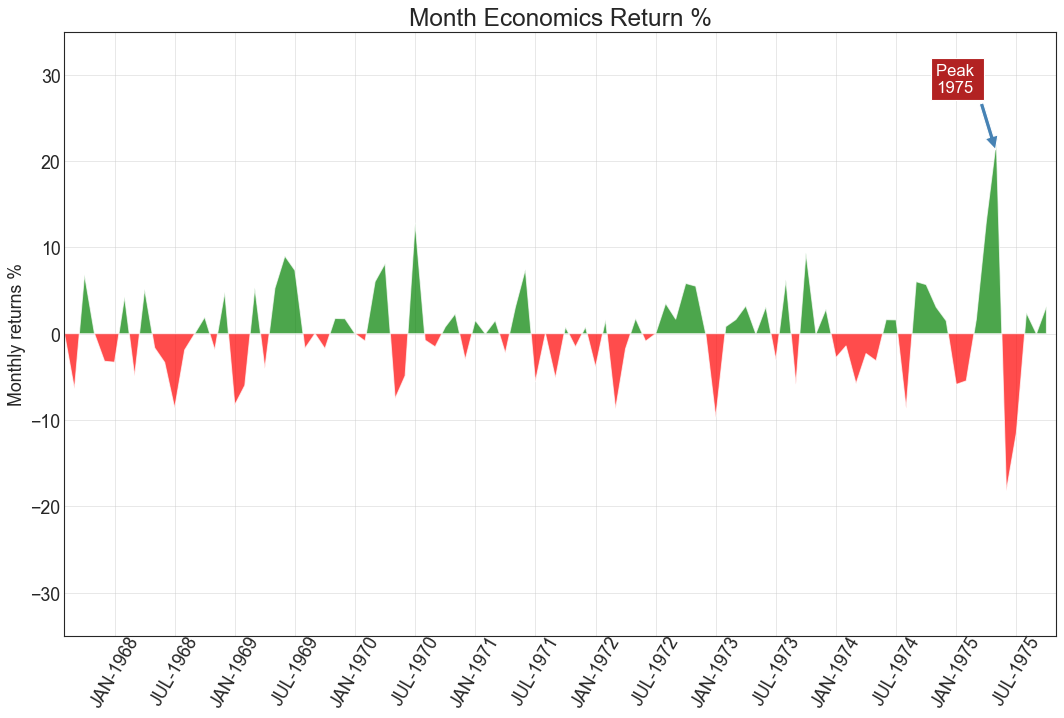

In [15]:
# step1：导入数据
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])                    # 创造一个和数据相同长度的序列
y_returns = (df.psavert.diff().fillna(0) / df.psavert.shift(1)).fillna(0) * 100     # 获取所需要的数据

# step2：绘制面积图
    # 画布
plt.figure(figsize = (16, 10),    # 画布尺寸 
           dpi = 80)              # 分辨率
    # 绘制面积图
plt.fill_between(x[1:],                        # 定义x坐标
                y_returns[1:],                 # 定义第一条曲线的纵坐标 
                0,                             # 定义第二条曲线的纵坐标  
                where = y_returns[1:] >= 0,    # 被填充的区域
                facecolor = 'green',           # 被填充的颜色（绿色）   
                interpolate = True,            # 交叉点区域的填充 
                alpha = 0.7)                   # 被填充区域的透明度 
plt.fill_between(x[1:],                        # 定义x坐标
                y_returns[1:],                 # 定义第一条曲线的纵坐标
                0,                             # 定义第二条曲线的纵坐标
                where = y_returns[1:] <= 0,    # 被填充的区域 
                facecolor = 'red',             # 被填充的颜色（虹色）
                interpolate = True,            # 交叉点区域的填充  
                alpha = 0.7)                   # 被填充区域的透明度

    # 添加注释
plt.annotate('Peak \n1975',                              # 文本内容
            xy = (94.0, 21.0),                           # 注释的起始位置   
            xytext = (88.0, 28),                         # 文本的起始位置
            bbox = dict  (boxstyle = 'square',           # 箱体的形态为方形
                          fc = 'firebrick'),             # 箱体的颜色
            arrowprops = dict(facecolor = 'steelblue',   # 箭头的类型，箭头的长度，箭头的宽度
                             shrink = 0.05),
            fontsize = 15,                               # 文本尺寸
            color = 'white')                             # 文本颜色

# step3：装饰
    # 横坐标
xtickvals = [str(m)[:3].upper() + '-' + str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]   # 组合为形如 JUL-1967
plt.gca().set_xticks(x[::6])            # 获取当前子图并设置当前子图的x轴刻度
    # x轴刻度标签
plt.gca().set_xticklabels(xtickvals[::6],                                       # x轴刻度
                         rotation = 60,                                         # 选择60度
                         fontdict = {'horizontalalignment': 'center',           # 水平对齐参数
                                     'verticalalignment': 'center_baseline'})   # 垂直对齐参数

    # 设置当前y坐标轴的范围
plt.ylim(-35, 35)
    # 设置当前x坐标轴的范围
plt.xlim(1, 100)
    # 设置图像标题
plt.title('Month Economics Return %',   # 标题名称
          fontsize = 22)                # 标题尺寸
    # 设置y轴标题
plt.ylabel('Monthly returns %')
    # 设置网格
plt.grid(alpha = 0.5)
plt.show()                              # 显示图像

